Enter your image path: Ocean.bmp
23386619.0


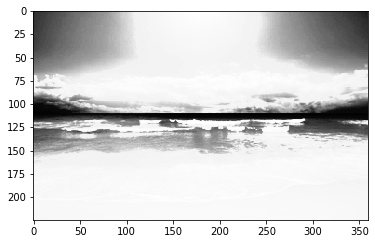

In [3]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
# g = input("Enter file name: ")
# print (g)
def slope(a,b,c,d):
    deltaY= d-b
    deltaX= c-a
    return deltaY/deltaX
def y_intercept(a,b,s):
    x=s*a
    y= b-x
    return y
def open_image():
    val = input("Enter your image path: ")  
    image = Image.open(val)
    oceanArray = np.array(image)#return an array of the image
    return oceanArray
def computeContrast(a,b,c,d):
    oceanArray = open_image()
    newOceanArray = np.zeros((oceanArray.shape[0],oceanArray.shape[1]))
    y1intercept = y_intercept(0,0,slope(0,0,a,b))
    y2intercept = y_intercept(a,b,slope(a,b,c,d)) #slope 1.4
    y3intercept = y_intercept(c,d,slope(c,d,255,255))
    for row in range(0,len(oceanArray)):
        for col in range(0,len(oceanArray[row])):
            if (oceanArray[row][col]>c):
                newValue=(((slope(c,d,255,255))*oceanArray[row][col])+ y3intercept)
                newOceanArray[row][col]=newValue
            elif(oceanArray[row][col]<=c and oceanArray[row][col]>a):
                s2= slope(a,b,c,d)
                newValue=((s2*oceanArray[row][col])+y2intercept)
                newOceanArray[row][col]=newValue
            elif(oceanArray[row][col]<=a):
                newValue=((slope(0,0,a,b))*oceanArray[row][col]+y1intercept)
                newOceanArray[row][col]=newValue
    plt.imshow(newOceanArray,cmap="gray")
    plt.imsave("Ocean_b.bmp",newOceanArray,cmap="gray")
    uniqueList = range(256)
    co_occurrence_size=(len(uniqueList))+1
    co_occurrence_matrix = np.zeros((co_occurrence_size,co_occurrence_size))
    for j in range(1,len(co_occurrence_matrix)):
        i=j-1
        co_occurrence_matrix[0][j]=uniqueList[i]
    for i in range(1,len(co_occurrence_matrix)):
        k=i-1
        co_occurrence_matrix[i][0]=uniqueList[k]
    southIndex=-1
    northIndex=-1
    for row in range(0,len(newOceanArray)):
        for col in range(0,len(newOceanArray[row])):
            southRow=row+1
            if(southRow<len(newOceanArray)):
                #do co-occurrence logic
                northValue=math.floor(newOceanArray[row][col] )    
                southValue=math.floor(newOceanArray[southRow][col])
                #loop to get index of each in co-occurrence
                # South
                for k in range (1,len(co_occurrence_matrix)):
                    if (co_occurrence_matrix[0][k]==southValue):
                        southIndex=k
                        break
                for n in range(1,len(co_occurrence_matrix)):
                    if (co_occurrence_matrix[n][0]==northValue):
                        northIndex=n
                        break
                if(northIndex!=-1 and southIndex !=-1): 
                    co_occurrence_matrix[northIndex][southIndex]=co_occurrence_matrix[northIndex][southIndex]+1
                    #print (co_occurrence_matrix[northIndex][southIndex])
    contrastResult=0
    for row in range(1,len( co_occurrence_matrix)):
        for col in range(1,len( co_occurrence_matrix[row])):
            contrastResult+=co_occurrence_matrix[row][col]*((co_occurrence_matrix[0][col]-co_occurrence_matrix[row][0])*(co_occurrence_matrix[0][col]-co_occurrence_matrix[row][0]))
    print(contrastResult)
#computeContrast(30,20,180,230)
computeContrast(70,20,140,240)